# Residue classes

File `residueclasses/rclass.jl` contains some code to represent and visualize [residue or congruence classes](https://en.wikipedia.org/wiki/Modular_arithmetic#Congruence_classes) in modular arithmetic.

In [1]:
include("residueclasses/rclass.jl")

using .ResidueClasses

## The residue class struct `RClass{N}`

`RClass{N}` represents a residue class ring ℤ modulo `N`ℤ. An instance *ā* of `RClass{N}` represents a concrete residue class of this ring, i.e the set of integers congruent to *a* modulo `N`.

`RClass{N}` is implemented in Julia as [parametric struct](https://docs.julialang.org/en/v1/manual/types/#Parametric-Types-1) with the parameter `{N}` and a single field `a`.

For example, this is the residue class ring ℤ modulo 3ℤ:

In [2]:
RClass{3}

RClass{3}

We can instantiate a concrete residue class $\bar{1}$ modulo 3ℤ:

In [3]:
r = RClass{3}(1)
r

1 in ℤ/3ℤ

The short notation for a residue class ring $\mathbb Z \mod N\mathbb Z$ is $\mathbb Z/N\mathbb Z$, hence the above notation "$\bar 1$ in  $\mathbb Z/3\mathbb Z$".

NB: You *can* create a type for an invalid residue class ring, e.g. `RClass{0}` or `RClass{-1}`. However, you won't be able to instantiate any residue classes in such an invalid ring then:

In [4]:
RClass{0}

RClass{0}

In [5]:
RClass{0}(0)

LoadError: N must be integer > 1

The only field of this struct is `a`, which is the residue class integer:

In [6]:
r.a  # (it's an unsigned integer and Julia by default displays it as hex code)

0x0000000000000001

In ring ℤ modulo *N*ℤ there are *N* residue classes. In our case, we have three classes:

In [7]:
r0 = RClass{3}(0)
r1 = RClass{3}(1)
r2 = RClass{3}(2)
r0, r1, r2

(0 in ℤ/3ℤ, 1 in ℤ/3ℤ, 2 in ℤ/3ℤ)

For all other integers, we get the equivalent residue classes, i.e. all integers $x$ with the same residue $a = x \mod 3$ belong to the same residue class $\bar{a}$.

In [8]:
RClass{3}(3)

0 in ℤ/3ℤ

In [9]:
RClass{3}(-4) == RClass{3}(-1) == r2 == RClass{3}(5)

true

## Comparison and arithmatic operations on residue classes

In the above example, you can see that the `==` **comparison operator** is implemented for `RClass{N}`. All other common comparison operators are also implemented.

Basic arithmetic operations on residue classes in the same ring are implemented as well:

In [10]:
r1 + r2   # = (1 + 2) mod 3

0 in ℤ/3ℤ

In [11]:
r1 - r2   # = (1 - 2) mod 3

2 in ℤ/3ℤ

In [12]:
r1 * r2   # = (1 * 2) mod 3

2 in ℤ/3ℤ

In [13]:
r2 * r2   # = (2 * 2) mod 3

1 in ℤ/3ℤ

In [14]:
r2^2      # = (2²) mod 3 

1 in ℤ/3ℤ

In [15]:
r2 / r2   # = (2 * 2^-1) mod 3

1 in ℤ/3ℤ

The division operatation `x / y` is a bit special. It requires the second operand `y` to have a multiplicative inverse `y^-1` or `inv(y)`. Not all residue classes have an inverse. Of course $\bar 0$ never has an inverse, because there is no residue class $\bar{0^{-1}}$ in any ring that gives $\bar 0 \cdot \bar{0^{-1}} = \bar 1$:

In [16]:
inv(r0)

LoadError: residual class 0 in ℤ/3ℤ has no inverse

However, in modular arithmetic, there can also be residue classes other than $\bar 0$ that have no multiplicative inverse. For example $\bar 2 \mod 4 \mathbb Z$ has no inverse, because there is no residue class $\bar{2^{-1}}$ **in residue class ring $\mathbb Z/4\mathbb Z$** that satisfies $\bar 2 \cdot \bar{2^{-1}} = \bar 1$. Substitute all four possible residue classes $\bar 0$, $\bar 1$, $\bar 2$, $\bar 3$ for $\bar{2^{-1}}$ and you'll see that none of them multiplied by $\bar 2$ gives $\bar 1$ in $\mathbb Z/4\mathbb Z$.

We can use `hasinv()` to check if a given residue class has a multiplicative inverse:

In [17]:
hasinv(RClass{4}(2))

false

In [18]:
hasinv(RClass{4}(3))

true

In [19]:
inv(RClass{4}(3))   # (3 * 3) mod 4 = 9 mod 4 = 1

3 in ℤ/4ℤ

## Multiplication and addition tables

We can use a multiplication table for a given residue class ring to show us quickly the multiplication results between each element in the ring. The function `table()` takes the arguments $N$ and an operator. For example, for a ring $\mathbb Z/4\mathbb Z$ the multiplication table below gives us the results of the multiplication between all four possible residue classes $\bar 0$, $\bar 1$, $\bar 2$, $\bar 3$:

In [20]:
table(4, *)

4×4 Matrix{Integer}:
 0  0  0  0
 0  1  2  3
 0  2  0  2
 0  3  2  1

The result from the `visualize_table()` function may be easier to understand:

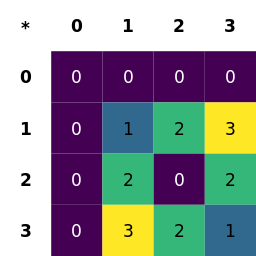

In [21]:
visualize_table(4, *)

By looking at the row or column for the residue class $\bar 2$ in $\mathbb Z/4\mathbb Z$, we can see that there is no other operand that gives $\bar 1$ and therefore $\bar 2$ has no inverse. We also see that $\bar 1$ and $\bar 3$ have inverses.

In comparison, all residue classes but $\bar 0$ in $\mathbb Z/7\mathbb Z$ have an inverse:

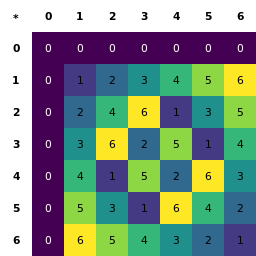

In [22]:
visualize_table(7, *)

In general, all residue class rings $\mathbb Z/p\mathbb Z$ with $p$ being prime have this property. You can pass the parameter `gray=true` to highlight the elements $\bar 1$:

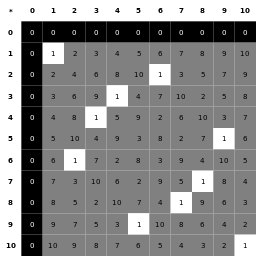

In [23]:
visualize_table(11, *, gray=true)

You may also pass `+` as operator which gives an addition table:

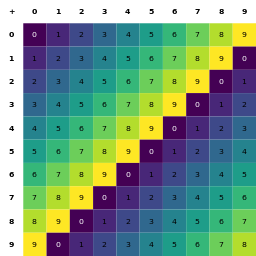

In [24]:
visualize_table(10, +)

By setting the start number to 1 (to omit all zeros) and disabling labels, the resulting pictures become artistic:

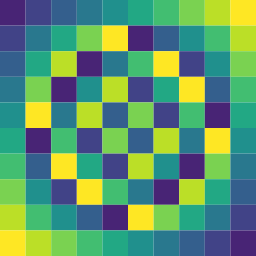

In [25]:
visualize_table(11, *, startnum=1, drawlabels=false)

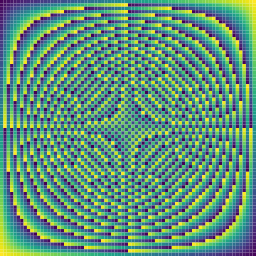

In [26]:
visualize_table(77, *, startnum=1, drawlabels=false)